In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

In [15]:
# To find the probability density at t = 2 for 24 degrees of freedom:
# The t.pdf() function is the Probability Density Function. 

# Degrees of freedom
df = 24

# t-value
t_value = 2

# Calculate PDF
pdf_value = stats.t.pdf(t_value, df)
print(pdf_value)

0.057484743899123586


In [14]:
# To find the t-value for a 95% confidence interval with 24 degrees of freedom
# The t.ppf() function is the Percent Point Function
# Degrees of freedom
df = 24

# 95% confidence interval (two-tailed)
alpha = 0.05
t_value = stats.t.ppf(1 - alpha/2, df)
print(t_value)


2.0638985616280205


mean: 193.32
standard deviation: 26.73
t-value: 2.06
margin of error: 11.01
confidence interval: (182.31, 204.33)


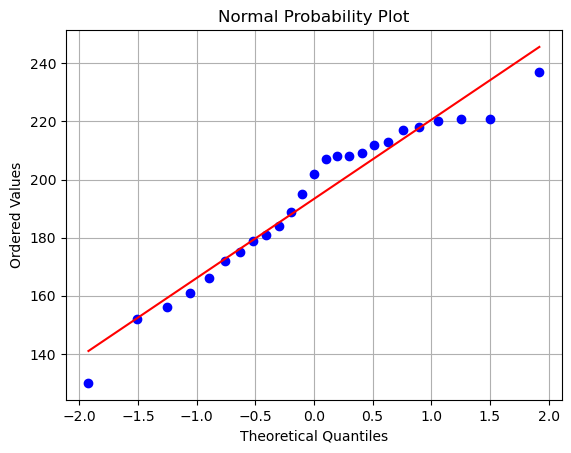

In [17]:
# good example for a t-test and tests for normality

data = [156, 212, 218, 189, 172, 221, 175, 208, 
                152, 184, 209, 195, 207, 179, 181, 202, 
                166, 213, 221, 237, 130, 217, 161, 208, 220
               ]


fix, ax = plt.subplots()
stats.probplot(data, dist="norm", plot=ax)
plt.title("Normal Probability Plot")
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Ordered Values')
plt.grid(True)

# Shapiro-Wilk test for normality
shapiro_test = stats.shapiro(data)
shapiro_test

# These results suggest that the data is reasonably close to a normal distribution.

# t-test
mean = np.mean(data)
std_dev = round(np.std(data,ddof=1),2)
n = len(data)
confidence_level = 0.95
alpha = 1 - confidence_level


# t-value for 95% confidence interval and 24 degrees of freedom (n-1)
t_value = round(stats.t.ppf(1-alpha/2, n-1),2)
margin_of_error = round(t_value *(std_dev/np.sqrt(n)),2)

# confidence interval
confidence_interval = (round((mean - margin_of_error),2), round((mean + margin_of_error),2))

print(f'mean: {mean}')
print(f'standard deviation: {std_dev}')
print(f't-value: {t_value}')
print(f'margin of error: {margin_of_error}')
print(f'confidence interval: {confidence_interval}')

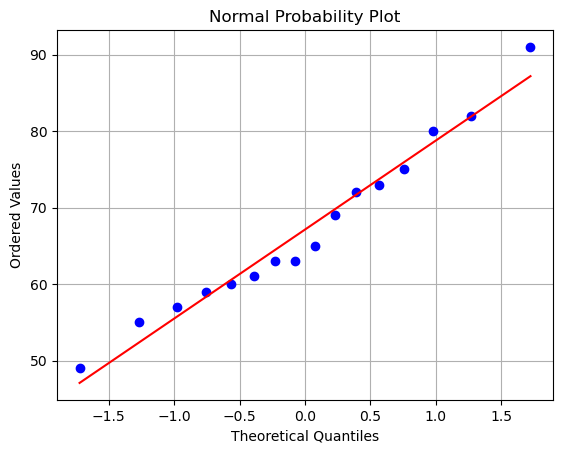

In [2]:
data = [57, 69, 63, 49, 63, 61, 72, 65, 91, 59, 82, 60, 75, 55, 80, 73]

fix, ax = plt.subplots()
stats.probplot(data, dist="norm", plot=ax)
plt.title("Normal Probability Plot")
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Ordered Values')
plt.grid(True)

In [6]:
mean = np.mean(data)
print(mean)

67.125


In [21]:
std_dev = np.std(data, ddof=1)
print(round(std_dev,2))

11.11


In [9]:
n = len(data)
df = n - 1
print(df)

15


In [19]:
t_value = stats.t.ppf(1-0.05,df)
print(round(t_value,2))

1.75


In [20]:
ME = t_value * (std_dev / np.sqrt(n))
print(round(ME,2))

4.87


In [18]:
confidence_interval = (round(mean - ME,2), round(mean + ME,2))
print(confidence_interval)

(62.26, 71.99)


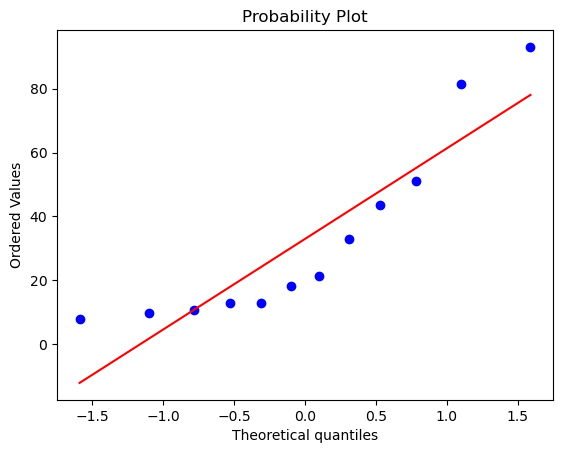

In [25]:
data = [9.7, 93.1, 33.0, 21.2, 81.4, 51.1, 43.5, 10.6, 12.8, 7.8, 18.1, 12.7]
fig, ax = plt.subplots()
stats.probplot(data, dist="norm", plot=ax)
plt.show()

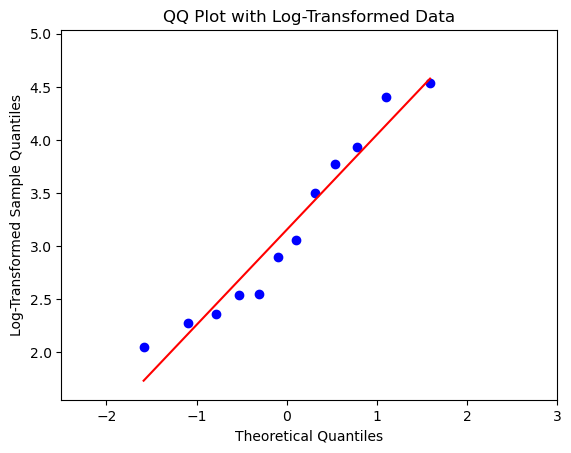

In [30]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

# Data provided by the user
data = [9.7, 93.1, 33.0, 21.2, 81.4, 51.1, 43.5, 10.6, 12.8, 7.8, 18.1, 12.7]

# Apply log transformation to the data to handle skewness
data_transformed = np.log(data)

# Create a QQ plot
fig, ax = plt.subplots()
stats.probplot(data_transformed, dist="norm", plot=ax)

# Customize the plot
# ax.get_lines()[1].set_color('red')  # Change the color of the fit line
# ax.get_lines()[1].set_linestyle('--')  # Change the linestyle of the fit line
ax.set_title('QQ Plot with Log-Transformed Data')
ax.set_xlabel('Theoretical Quantiles')
ax.set_ylabel('Log-Transformed Sample Quantiles')

# Adjust the axis limits if needed
ax.set_xlim([-2.5, 3])
ax.set_ylim([np.min(data_transformed) - 0.5, np.max(data_transformed) + 0.5])

# Show the plot
plt.show()


In [11]:
# generate t-values
df = 6
t_010_one_tailed = stats.t.ppf(1-0.10,df)
t_010_two_tailed = stats.t.ppf(1-0.05, df)
print(round(t_010_one_tailed,4), round(t_010_two_tailed,3))

1.4398 1.943


In [10]:
# generate t-values
df = 21
t_010_one_tailed = stats.t.ppf(1-0.10,df)
t_001_one_tailed = stats.t.ppf(1-0.01,df)
print(round(t_010_one_tailed,4))
print(round(t_001_one_tailed,4))

1.3232
2.5176


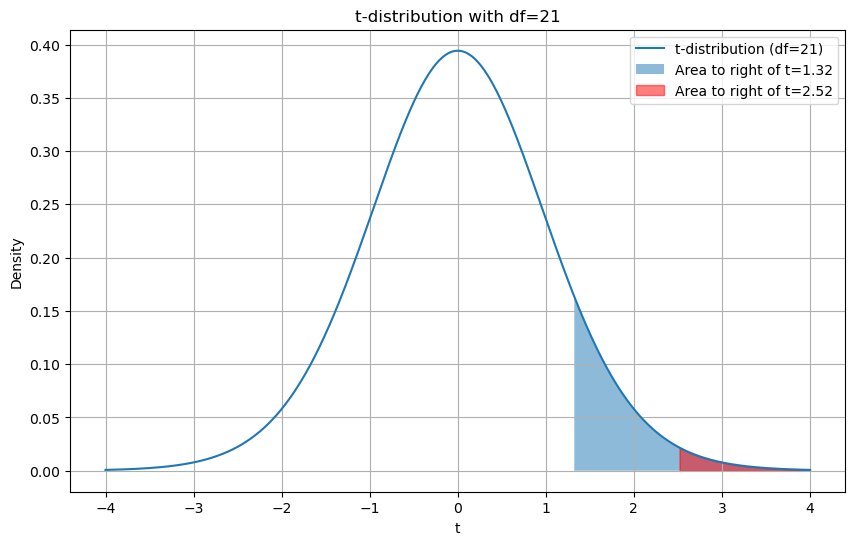

(1.3231878738651723, 2.517648016044097)

In [12]:
# Degrees of freedom
df = 21

# 1. t-value with an area of 0.10 to its right
t_0_10_right = stats.t.ppf(1-0.10, df)

# 2. t-value for t0.01 (two-tailed, alpha = 0.01)
t_0_01 = stats.t.ppf(1-0.01, df)

# Generate x values for t-distribution
x = np.linspace(-4, 4, 1000)
y = stats.t.pdf(x, df)

# Plot the t-distribution
plt.figure(figsize=(10, 6))
plt.plot(x, y, label='t-distribution (df=21)')

# Shade the area to the right of t_0_10_right
x_fill_right = np.linspace(t_0_10_right, 4, 100)
y_fill_right = stats.t.pdf(x_fill_right, df)
plt.fill_between(x_fill_right, y_fill_right, alpha=0.5, label=f'Area to right of t={t_0_10_right:.2f}')

# Shade the area to the right of t_0_01 (one-tailed)
x_fill_01 = np.linspace(t_0_01, 4, 100)
y_fill_01 = stats.t.pdf(x_fill_01, df)
plt.fill_between(x_fill_01, y_fill_01, alpha=0.5, label=f'Area to right of t={t_0_01:.2f}', color='red')

# Labels and title
plt.title('t-distribution with df=21')
plt.xlabel('t')
plt.ylabel('Density')
plt.legend()
plt.grid(True)

# Show plot
plt.show()

t_0_10_right, t_0_01


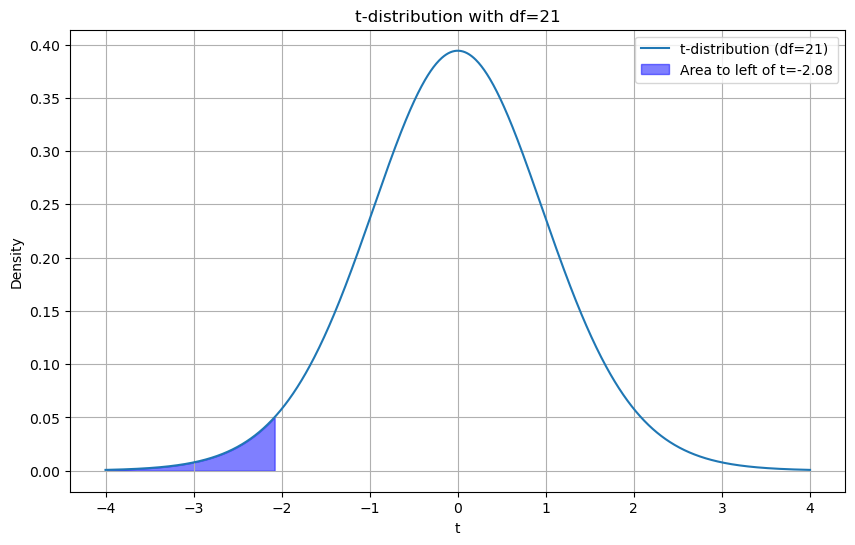

-2.0796138447276626

In [14]:
# t-value with an area of 0.025 to the left
t_0_025_left = stats.t.ppf(0.025, df)

# Generate x values for t-distribution
x = np.linspace(-4, 4, 1000)
y = stats.t.pdf(x, df)

# Plot the t-distribution
plt.figure(figsize=(10, 6))
plt.plot(x, y, label='t-distribution (df=21)')

# Shade the area to the left of t_0_025_left
x_fill_left = np.linspace(-4, t_0_025_left, 100)
y_fill_left = stats.t.pdf(x_fill_left, df)
plt.fill_between(x_fill_left, y_fill_left, alpha=0.5, label=f'Area to left of t={t_0_025_left:.2f}', color='blue')

# Labels and title
plt.title('t-distribution with df=21')
plt.xlabel('t')
plt.ylabel('Density')
plt.legend()
plt.grid(True)

# Show plot
plt.show()

t_0_025_left


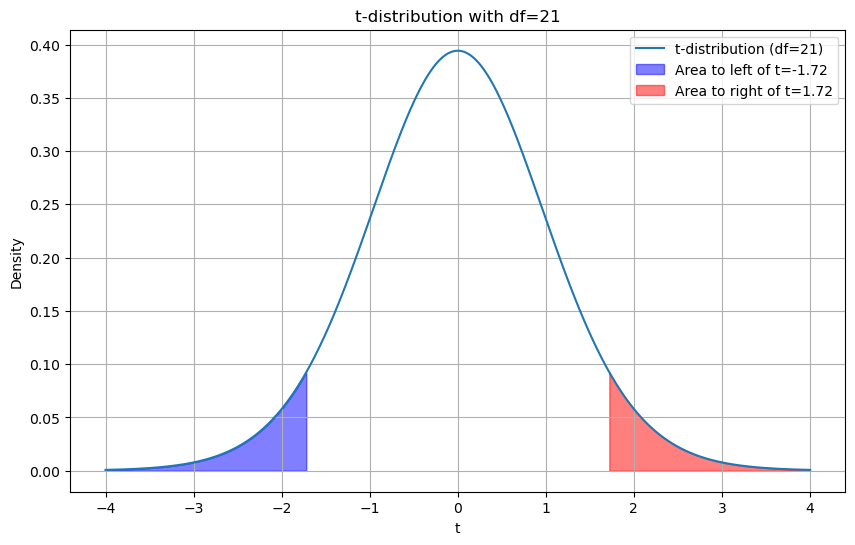

(-1.7207429028118777, 1.7207429028118775)

In [15]:
# t-values that divide the area under the curve into a middle 0.90 area with outside tails of 0.05 each
t_0_05_left = stats.t.ppf(0.05, df)
t_0_05_right = stats.t.ppf(1-0.05, df)

# Generate x values for t-distribution
x = np.linspace(-4, 4, 1000)
y = stats.t.pdf(x, df)

# Plot the t-distribution
plt.figure(figsize=(10, 6))
plt.plot(x, y, label='t-distribution (df=21)')

# Shade the area to the left of t_0_05_left
x_fill_left = np.linspace(-4, t_0_05_left, 100)
y_fill_left = stats.t.pdf(x_fill_left, df)
plt.fill_between(x_fill_left, y_fill_left, alpha=0.5, label=f'Area to left of t={t_0_05_left:.2f}', color='blue')

# Shade the area to the right of t_0_05_right
x_fill_right = np.linspace(t_0_05_right, 4, 100)
y_fill_right = stats.t.pdf(x_fill_right, df)
plt.fill_between(x_fill_right, y_fill_right, alpha=0.5, label=f'Area to right of t={t_0_05_right:.2f}', color='red')

# Labels and title
plt.title('t-distribution with df=21')
plt.xlabel('t')
plt.ylabel('Density')
plt.legend()
plt.grid(True)

# Show plot
plt.show()

t_0_05_left, t_0_05_right


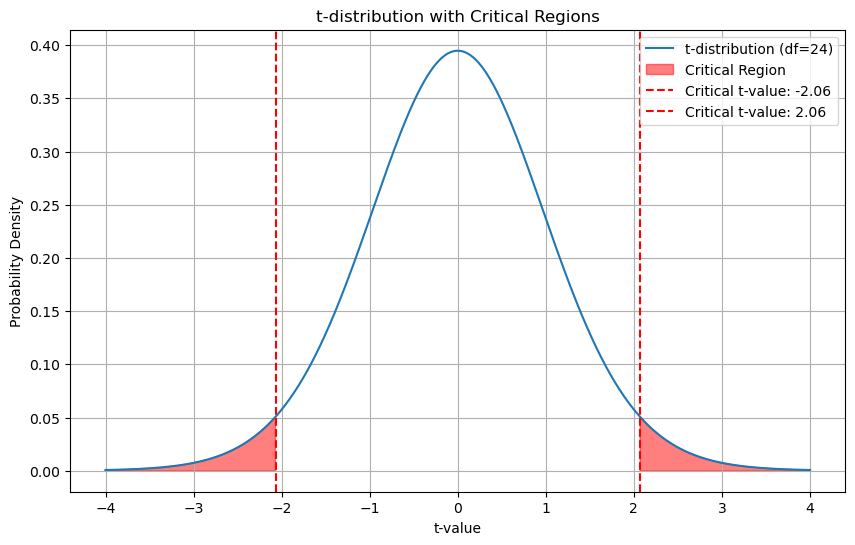

In [16]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

# Parameters
df = 24
alpha = 0.05

# Generate t-values
x = np.linspace(-4, 4, 1000)
y = stats.t.pdf(x, df)

# Critical t-values for 95% confidence interval
t_crit = stats.t.ppf(1 - alpha/2, df)

# Plotting the t-distribution
plt.figure(figsize=(10, 6))
plt.plot(x, y, label='t-distribution (df=24)')

# Shade the critical regions
plt.fill_between(x, 0, y, where=(x <= -t_crit) | (x >= t_crit), color='red', alpha=0.5, label='Critical Region')

# Add lines for critical t-values
plt.axvline(-t_crit, color='red', linestyle='--', label=f'Critical t-value: {-t_crit:.2f}')
plt.axvline(t_crit, color='red', linestyle='--', label=f'Critical t-value: {t_crit:.2f}')

# Add labels and legend
plt.title('t-distribution with Critical Regions')
plt.xlabel('t-value')
plt.ylabel('Probability Density')
plt.legend()
plt.grid(True)

# Show plot
plt.show()
